WALMART PROJECT

In [1]:
import numpy as np                         #Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('Walmart (1).csv')          #Loading the Dataset

In [37]:
df.head(3)                                 

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106


In [38]:
#df['Date']=pd.to_datetime(df['Date']);
df["Date"]=pd.to_datetime(df['Date'],format='%d-%m-%Y')

In [39]:
df.info()                              #Checking for Dtype & Null Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [3]:
df.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


In [6]:
df.shape                              #Shape of the Dataset

(6435, 8)

In [7]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [8]:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

Splitting the Year Column

In [7]:

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.week

In [10]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,17
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,48
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,18


# Holiday sales aggregate data

In [11]:
holiday_sales=df[(df['Holiday_Flag']==1)&(df['Weekly_Sales'])]
holiday_sales1=holiday_sales.groupby(['Store']).Weekly_Sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()
holiday_sales1.head()

,Store,max,min,mean,median,std
0,1,2033320.66,1367320.01,1665747.656,1645786.185,209974.392292
1,2,2658725.29,1748000.65,2079266.900,2001049.875,330650.410427
2,3,565567.84,352260.97,437811.050,415641.420,72836.284722
3,4,3004702.33,1794868.74,2243102.624,2156476.005,385468.869955
4,5,507900.07,298180.18,359501.607,335175.050,75657.729460


#   Start date and End date

In [12]:
print('Start date:',df['Date'].min())            #Start and end date for the given dataset
print('End date:',df['Date'].max())

Start date: 2010-01-10 00:00:00
End date: 2012-12-10 00:00:00


# Maximum Sales in the store

In [13]:
Sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
pd.DataFrame(Sales).head(1)

,Weekly_Sales
Store,
20,3.013978e+08


# Minimum Sales in the store

In [14]:
pd.DataFrame(Sales).tail(1)

,Weekly_Sales
Store,
33,37160221.96


In [15]:
group_data = df.groupby(['Store']).Weekly_Sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()
group_data.head()

     

,Store,max,min,mean,median,std
0,1,2387950.20,1316899.31,1.555264e+06,1534849.64,155980.767761
1,2,3436007.68,1650394.44,1.925751e+06,1879107.31,237683.694682
2,3,605990.41,339597.38,4.027044e+05,395107.35,46319.631557
3,4,3676388.98,1762539.30,2.094713e+06,2073951.38,266201.442297
4,5,507900.07,260636.71,3.180118e+05,310338.17,37737.965745


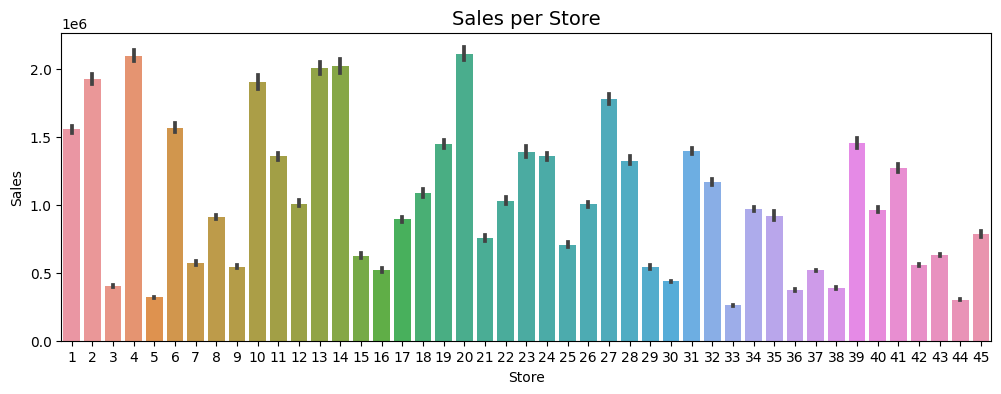

In [6]:
plt.figure(figsize=(12,4))
sns.barplot(x='Store',y='Weekly_Sales',data=df)
plt.title('Sales per Store', fontsize=14)
plt.ylabel('Sales', fontsize=10)
plt.xlabel('Store', fontsize=10)
plt.show()

# To find out variation in the sales , find Standard deviation

In [17]:
std_df = df.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False)

In [18]:
pd.DataFrame(std_df).head()

,Weekly_Sales
Store,
14,317569.949476
10,302262.062504
20,275900.562742
4,266201.442297
13,265506.995776


In [19]:
str_14 = df[df.Store == 14].Weekly_Sales


In [20]:
m_std = str_14.std()/str_14.mean()*100          # Mean to Standard Deviation 

m_std.round(3)

15.714

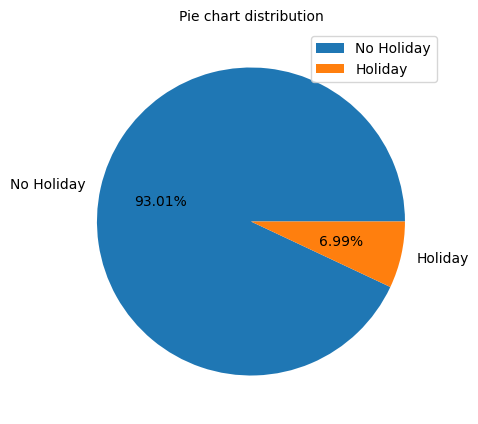

In [21]:
plt.figure(figsize=(5,5))
plt.pie(df['Holiday_Flag'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Pie chart distribution",fontsize=10)
plt.legend()
plt.show()

Text(0.5, 1.0, 'sales-Fuel Price')

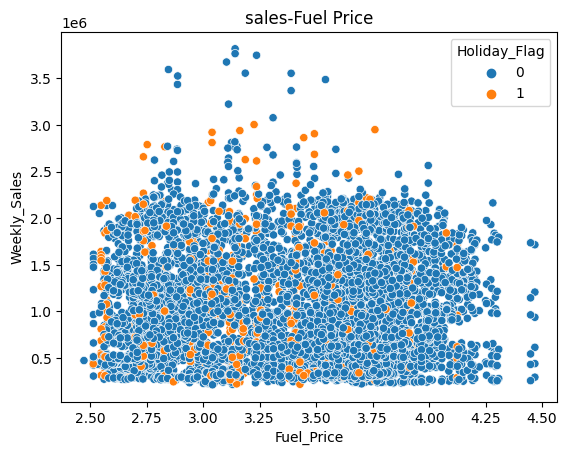

In [22]:
sns.scatterplot(data=df,y='Weekly_Sales',x='Fuel_Price',hue='Holiday_Flag').set_title('sales-Fuel Price')

Text(0.5, 1.0, 'sales Vs temp')

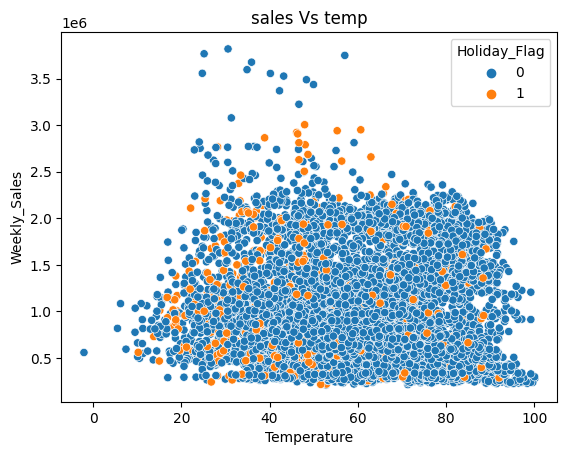

In [23]:
sns.scatterplot(data=df,y='Weekly_Sales',x='Temperature',hue='Holiday_Flag').set_title('sales Vs temp')

**Insights**
* Sales does not depend on temperature except at very low and very high temp

Text(0.5, 1.0, 'sales vs Unemployment')

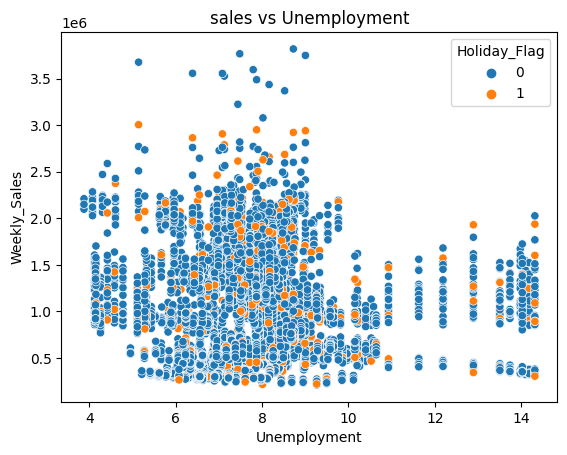

In [24]:
sns.scatterplot(data=df,y='Weekly_Sales',x='Unemployment',hue='Holiday_Flag').set_title('sales vs Unemployment')

In [25]:
weekly_sales = df.groupby(['Year','Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2010 = df.loc[df['Year']==2010].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2011 = df.loc[df['Year']==2011].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2012 = df.loc[df['Year']==2012].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})

# Weekly sales for every week of an year

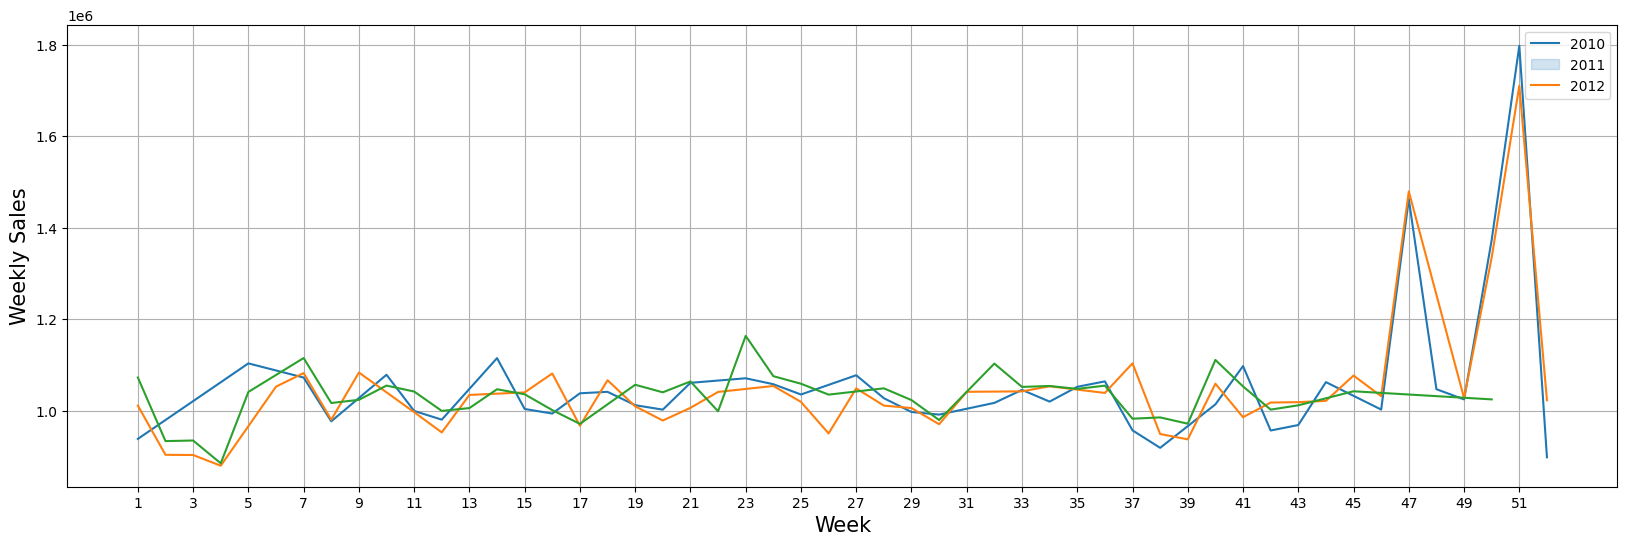

In [26]:
plt.figure(figsize=(20, 6))
sns.lineplot(x=weekly_sales2010['Weekly_Sales']['mean'].index, y=weekly_sales2010['Weekly_Sales']['mean'].values)
sns.lineplot(x=weekly_sales2011['Weekly_Sales']['mean'].index, y=weekly_sales2011['Weekly_Sales']['mean'].values)
sns.lineplot(x=weekly_sales2012['Weekly_Sales']['mean'].index, y=weekly_sales2012['Weekly_Sales']['mean'].values)
plt.grid()
plt.legend(['2010', '2011', '2012'])
plt.xticks(np.arange(1, 53, step=2))
plt.ylabel('Weekly Sales', fontsize=15)
plt.xlabel('Week', fontsize=15)
plt.show()

In [8]:
df=df.sort_values(by="Date", key=pd.to_datetime)

**Time Series Analysis**

In [9]:
store=int(input("Enter the Store Number: "))    #Give the required Store number, in this case 1-45
store

6

In [10]:
df_dup=df

In [11]:
df=df.loc[:,['Date','Store','Weekly_Sales']]

In [12]:
store_fcast=df[df["Store"]==store]
store_fcast.head()

,Date,Store,Weekly_Sales
749,01-10-2010,6,1328468.89
723,02-04-2010,6,1770333.90
736,02-07-2010,6,1759777.25
717,19-02-2010,6,1567138.07
718,26-02-2010,6,1432953.21


In [13]:
store_fcast.set_index("Date",inplace=True)

In [14]:
store_fcast=store_fcast.drop(["Store"],axis=1)

<Axes: xlabel='Date'>

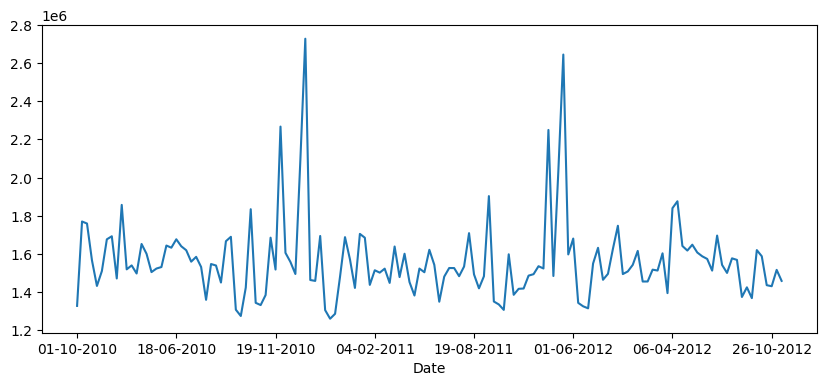

In [16]:
store_fcast["Weekly_Sales"].plot(figsize=(10,4))

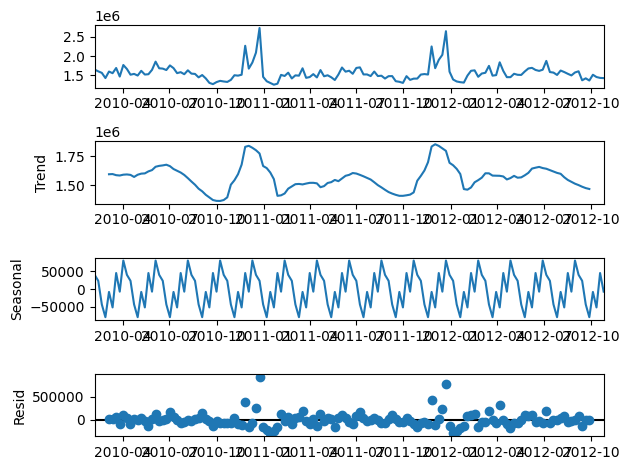

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(store_fcast,period=9)
result.plot();

In [49]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(store_fcast["Weekly_Sales"])
print(result)


(-5.492502135779504, 2.1594858682169703e-06, 4, 138, {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}, 3474.9714643671264)


In [50]:
def ADF_test(series):
    result=adfuller(series)
    print('ADF statistics: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print('reject null hypothesis and data is stationary')
    else:
        print('accept null hypothesis and data is not stationary')

In [51]:
ADF_test(df['Weekly_Sales'])

ADF statistics: -11.521977286498108
p-value: 4.0195757853472e-21
reject null hypothesis and data is stationary


In [52]:
def rolling (data):
    rl_mean=data.rolling(window=7).mean()
    rl_mean_detrend = data - rl_mean
    rl_mean_detrend_diff = rl_mean_detrend - rl_mean_detrend.shift()
    rl_mean_detrend_diff = rl_mean_detrend_diff.dropna()
    return rl_mean_detrend_diff

In [53]:
from pmdarima import auto_arima

In [54]:
if result[1]>0.05:
    Store_Forecast=rolling(store_fcast)
else:
    pass

**To check p,q,d values**

In [55]:
pqd_val= auto_arima(store_fcast['Weekly_Sales'], trace=True)
pqd_val.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3890.782, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3917.123, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3887.129, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3897.124, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4489.694, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3888.171, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3888.510, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3890.197, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3934.853, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.582 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1940.564
Date:                Sun, 05 Mar 2023   AIC                           3887.129
Time:                        22:37:08   BIC                           3896.017
Sample:                    02-05-2010   HQIC                          3890.740
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   8.603e+05   7.59e+04     11.333      0.000    7.11e+05    1.01e+06
ar.L1          0.4501      0.040     11.274      0.000       0.372       0.528
sigma2      3.601e+10      0.958   3.76e+10      0.000     3.6e+10     3.6e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):               531.16
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             2.02
Prob(H) (two-sided):                  0.20   Kurtosis:                        11.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.73e+25. Standard errors may be unstable.
"""

In [56]:
train = store_fcast.iloc[:110]['Weekly_Sales']
test = store_fcast.iloc[110:]['Weekly_Sales']


In [57]:
len(test)

33

**Using SARIMAX**

In [58]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults
model = SARIMAX(train, order=(2,1,3), seasonal_order=(2,1,3,48))


In [59]:
model = model.fit()

<Axes: xlabel='Date'>

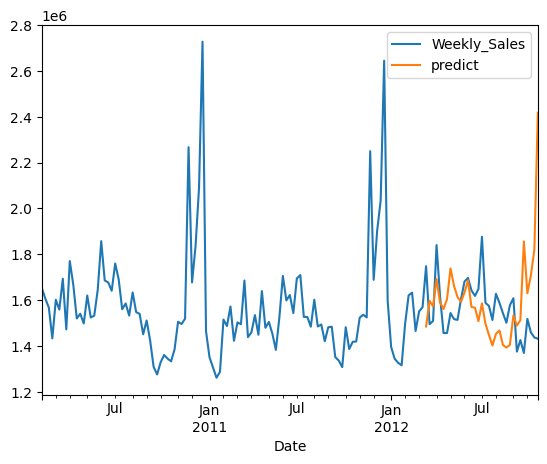

In [60]:
store_fcast['predict'] = model.predict(start= len(train) , end=len(train)+len(test)- 1, dynamic=True)
store_fcast[['Weekly_Sales','predict']].plot()

<Axes: >

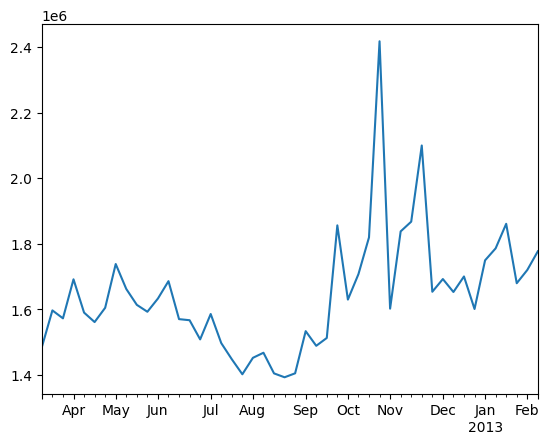

In [61]:
forecast=model.forecast(steps=48)
forecast.plot()

In [63]:
predict=store_fcast["predict"].dropna()
print(type(predict))
print(type(test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [64]:
Test_Pred=pd.DataFrame([test,predict])
K=Test_Pred.transpose().dropna()
K


,Weekly_Sales,predict
Date,,
2012-03-16,1748010.29,1.484759e+06
2012-03-23,1495143.62,1.596769e+06
2012-03-30,1508933.26,1.572529e+06
2012-04-06,1840131.19,1.691621e+06
2012-04-13,1616394.45,1.590096e+06
2012-04-20,1456073.24,1.561204e+06
2012-04-27,1456221.10,1.604735e+06
2012-05-04,1543461.12,1.738296e+06
2012-05-11,1517075.67,1.662168e+06


In [65]:
forecast_errors=K["Weekly_Sales"]-K["predict"]
bias = sum(forecast_errors) * 1.0/len(K["Weekly_Sales"])
bias

-33131.593642875625

In [66]:
from sklearn.metrics import r2_score
r2=r2_score(K["Weekly_Sales"],K["predict"])
r2

-3.2758288304446994

In [70]:
import sklearn.metrics as metrics
Mae = metrics.mean_absolute_error(K["Weekly_Sales"],K["predict"])
Mse = metrics.mean_squared_error(K["Weekly_Sales"],K["predict"])
print(Mae)
print(Mse)

165376.59726182165
58270519623.26537


In [71]:
Rmse = np.sqrt(Mse)
Rmse

241392.8740109479